# HR Analytics Project- Understanding the Attrition in HR

Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

row : 1470

columns : 35

Target : Attrition

Problem Type : Classification


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("HR-Analytic.csv")
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

We have 9 object type columns and left are integer type columns

In [4]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

THere is no missing values

In [5]:
df.apply(lambda x: len(x.unique()))

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

most of the columns are categorical type

In [24]:
cat_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        cat_col.append(i)
cat_col        

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [7]:
for cat in cat_col:
    print(cat)
    print(df[cat].value_counts())
    print()

Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Gender
Male      882
Female    588
Name: Gender, dtype: int64

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus

<AxesSubplot:xlabel='Attrition', ylabel='count'>

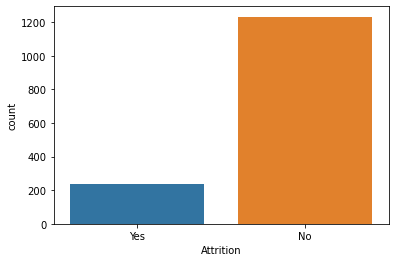

In [8]:
sns.countplot(df["Attrition"])

Attrition is our target column so here we can see the data imbalance

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

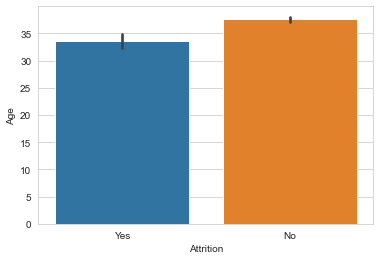

In [9]:
sns.set_style("whitegrid")
sns.barplot(x = 'Attrition',y = 'Age',data=df)

most of the age group above 35 are no Attrition 

<AxesSubplot:xlabel='Attrition', ylabel='Education'>

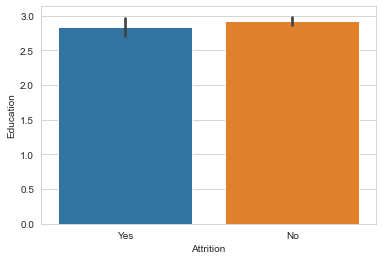

In [10]:
sns.set_style("whitegrid")
sns.barplot(x = 'Attrition',y = 'Education',data=df)

On the basis of yes and no attrition are equal in the case of education

<AxesSubplot:xlabel='Education', ylabel='count'>

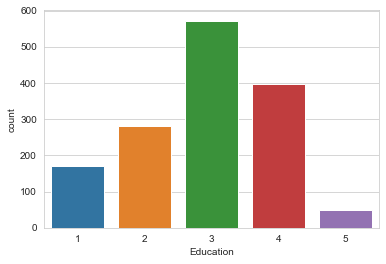

In [11]:
sns.countplot(df["Education"])

most of the employees are in 3rd class and less number of employee in 5th class. This class might be on the basis of high,mediam and low class.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

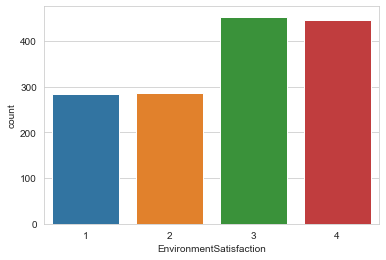

In [12]:
sns.countplot(df["EnvironmentSatisfaction"])

In the class of 3 and 4 are high satisfied with environment

<AxesSubplot:xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

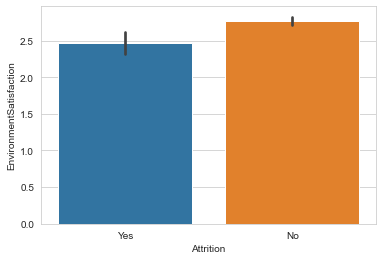

In [13]:
sns.set_style("whitegrid")
sns.barplot(x = 'Attrition',y ='EnvironmentSatisfaction',data=df)

Environmentsatisfaction is not that much effect in attrition

<AxesSubplot:xlabel='Gender', ylabel='Age'>

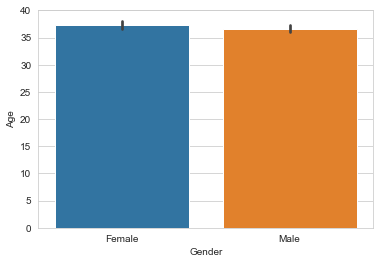

In [14]:
sns.set_style("whitegrid")
sns.barplot(x ='Gender',y ='Age',data=df)

Equal aged gender empolyees are there.

<AxesSubplot:xlabel='EmployeeNumber', ylabel='Density'>

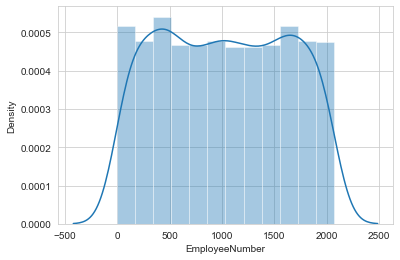

In [16]:
sns.distplot(df["EmployeeNumber"])

here we can see the distribtion is similer to normal

In [17]:
df["EmployeeNumber"].skew()

0.016574019580105036

In this columns skewness is not present

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

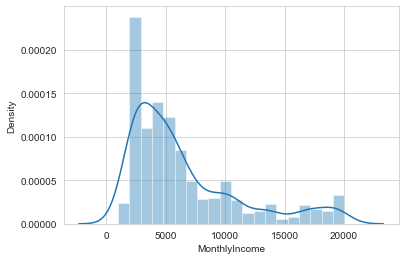

In [18]:
sns.distplot(df["MonthlyIncome"])

Here we can see that datas are right skewed median is higher than median

In [19]:
df["MonthlyIncome"].skew()

1.3698166808390662

In [21]:
df["MonthlyIncome"]=np.log(df["MonthlyIncome"])
df["MonthlyIncome"].skew()

0.1413967612303228

Now skewness is normal

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

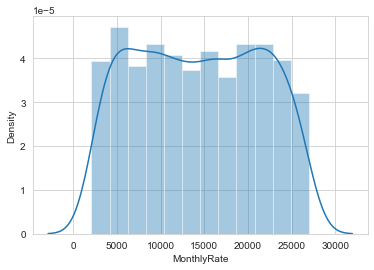

In [22]:
sns.distplot(df["MonthlyRate"])

Here also same case as before , it is similar as normal distribution

In [23]:
df["MonthlyRate"].skew()

0.018577807891132458

there is no skewness

# LabelEncoder for target

In [27]:
label=LabelEncoder()
df["Attrition"]=label.fit_transform(df["Attrition"])

let's solve data imbalance issue

In [28]:
df["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [29]:
count_class_0,count_class_1 = df.Attrition.value_counts()

# divided by class

df_class_0 = df[df["Attrition"]==0]
df_class_1 = df[df["Attrition"]==1]

In [30]:
df_class_0.shape

(1233, 35)

In [31]:
df_class_1.shape

(237, 35)

In [32]:
count_class_0,count_class_1

(1233, 237)

In [33]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)

Attrition_new = pd.concat([df_class_0,df_class_1_over],axis=0)
print("Random over-sampling:")

print(Attrition_new.Attrition.value_counts())

Random over-sampling:
1    1233
0    1233
Name: Attrition, dtype: int64


now data imbalance is solved

lets check:

In [39]:
x = Attrition_new.drop("Attrition",axis="columns")
y = Attrition_new["Attrition"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=20,stratify=y)

In [40]:
y_test.value_counts()

1    370
0    370
Name: Attrition, dtype: int64

see now its clear

# Encoding

In [41]:
cat_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [45]:
cat_col=['EducationField','JobRole','Over18']
for col in cat_col:
    df[col] = label.fit_transform(df[col])

In [50]:
cat_col2=['BusinessTravel','Department','Gender','MaritalStatus','OverTime']
for i in  cat_col2:
    df[i] = pd.get_dummies(df[i])

In [51]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,1,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,1,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,1,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,1,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,1,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


now all the columns are changed to numerical

# split

In [55]:
x=df.drop(columns=["Attrition"])
y=df["Attrition"]

# PCA

In [70]:
newpca = PCA(n_components=20)
x=newpca.fit_transform(x)

In [75]:

maxAccu=0
maxRs=0
for i in range(100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    lr =LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i

print("best accuracy is",maxAccu,"on random_state",maxRs)        

best accuracy is 0.8415637860082305 on random_state 38


In [76]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=38)

In [91]:
def eval(r):
    model=r
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test,pred)
    scr = cross_val_score(model,x,y,cv=3)
    print("Accuracy score is:",acc)
    print(confusion_matrix(y_test,pred))
    print("\n")
    print(classification_report(y_test,pred))
    print("\n")
    print("cross validation score :",scr.mean())

In [92]:
eval(LogisticRegression())

Accuracy score is: 0.8415637860082305
[[393  23]
 [ 54  16]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91       416
           1       0.41      0.23      0.29        70

    accuracy                           0.84       486
   macro avg       0.64      0.59      0.60       486
weighted avg       0.81      0.84      0.82       486



cross validation score : 0.4605442176870748


In [93]:
eval(GaussianNB())

Accuracy score is: 0.8559670781893004
[[402  14]
 [ 56  14]]


              precision    recall  f1-score   support

           0       0.88      0.97      0.92       416
           1       0.50      0.20      0.29        70

    accuracy                           0.86       486
   macro avg       0.69      0.58      0.60       486
weighted avg       0.82      0.86      0.83       486



cross validation score : 0.8462585034013607


In [94]:
eval(RandomForestClassifier())

Accuracy score is: 0.8539094650205762
[[408   8]
 [ 63   7]]


              precision    recall  f1-score   support

           0       0.87      0.98      0.92       416
           1       0.47      0.10      0.16        70

    accuracy                           0.85       486
   macro avg       0.67      0.54      0.54       486
weighted avg       0.81      0.85      0.81       486



cross validation score : 0.8408163265306122


In [95]:
eval(SVC())

Accuracy score is: 0.8559670781893004
[[416   0]
 [ 70   0]]


              precision    recall  f1-score   support

           0       0.86      1.00      0.92       416
           1       0.00      0.00      0.00        70

    accuracy                           0.86       486
   macro avg       0.43      0.50      0.46       486
weighted avg       0.73      0.86      0.79       486



cross validation score : 0.8387755102040816


Through above calculation we can say that RandomForest and GussianNB is the best model so lets try to tuning the performance

In [96]:
parameter={"max_depth":np.arange(1,10),
           "criterion":["gini","entropy"]}
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=5)
gcv.fit(x_train,y_train)
gcv.best_params_

{'criterion': 'entropy', 'max_depth': 9}

In [99]:
final_model=RandomForestClassifier(max_depth=9,criterion="entropy")
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
print(acc*100)

85.39094650205762


---> RandomForestClassifier is the best model 

---> Final accuracy is 85%

---> Tuning the model with Gridsearchcv using parameters.


In [104]:
joblib.dump(final_model,"fmodel.pkl")

['fmodel.pkl']